In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcParams
import seaborn as sns
# import warnings
import ipywidgets as widgets
from ipywidgets import *
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bike_buyers.csv")
df.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [3]:
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [4]:
def Fill_Missing_Value(df):
    ind=0
    med = 0 
    for i in df.dtypes:
        if i == 'float64' or i == 'int64':
            column_name=df.columns[ind]
            column_value=df[column_name][0:]
            med= column_value.median()
            df[column_name] = df[column_name].fillna(round(med,1))
        if i == 'object'or i=='o':
            column_name=df.columns[ind]
            column_value=df[column_name][0:]
            mode= column_value.mode().values[0]
            df[column_name] = df[column_name].fillna(mode,inplace=False)
        ind+=1
    return df
df=Fill_Missing_Value(df)
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
# df.drop('ID', axis=1, inplace=True)
df.head(5)
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [7]:
US=df.query("Region == 'North America'")
UK=df.query("Region == 'Europe'")
PACIFIC=df.query("Region == 'Pacific'")

IndexError: index 2 is out of bounds for axis 1 with size 2

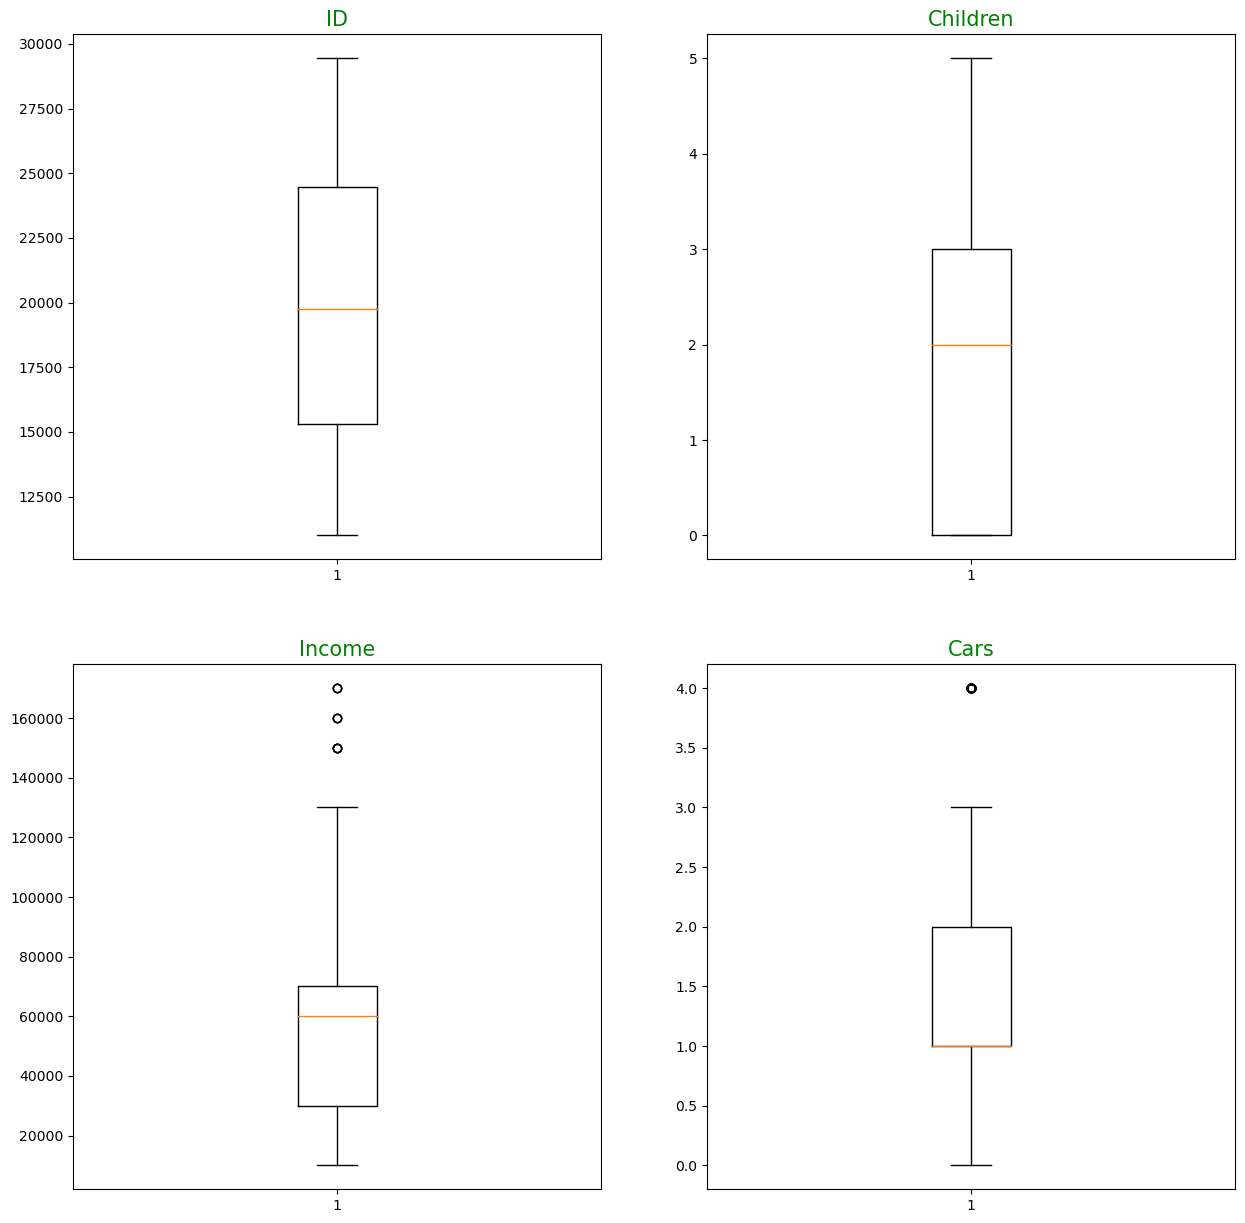

In [8]:
col=2 #Number of columns
row=2 #Number of rows

fig,ax=plt.subplots(row,col,figsize=(15,15))
r=ax.shape[0]
c=ax.shape[1]
fig.set_edgecolor('yellow')
out={} 
r1,c1=0,0
for i,j in enumerate(df.columns):
    
    if df[j].dtype!='object':
        box=ax[r1,c1].boxplot(df[j])
        ax[r1,c1].set_title(j,color='green',fontsize=15)
        
        out[j]=[item.get_ydata() for item in box['fliers']]
#         ax[r1,c1].set_facecolor('pink')
        r1+=1
        if r1==2:
            r1=0
            c1+=1

plt.show()

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

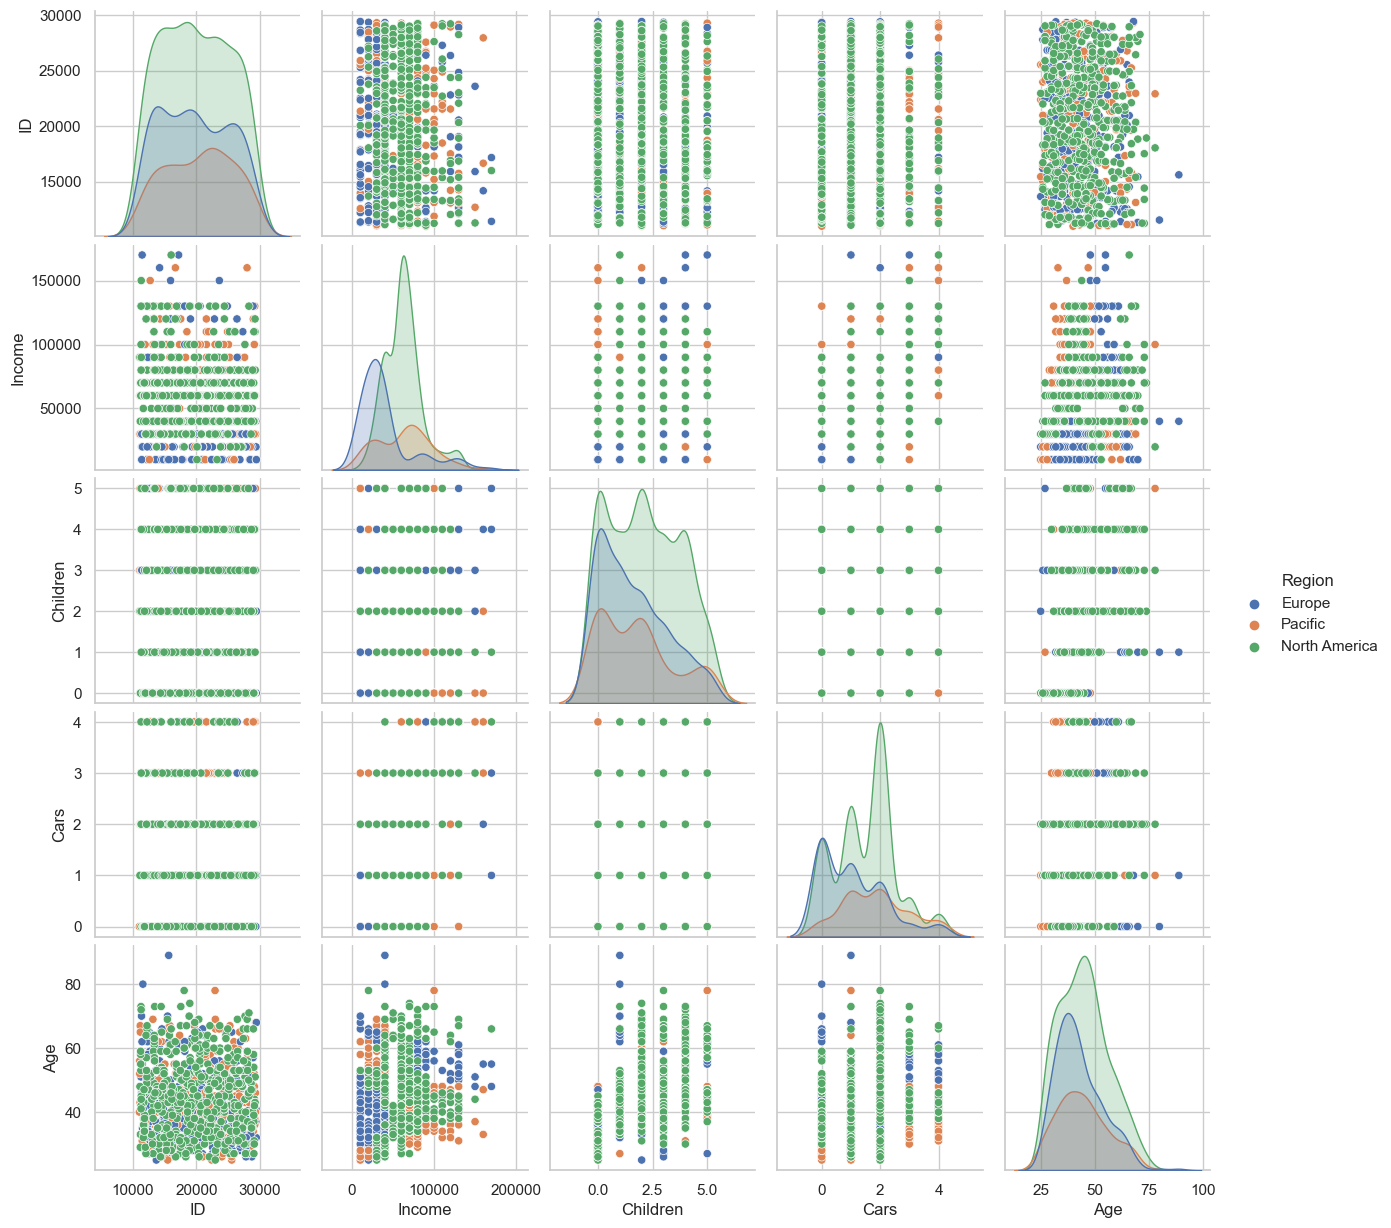

In [20]:
sns.set_theme(style="whitegrid")
sns.pairplot(df,hue="Region")

interactive(children=(Dropdown(description='Region', options=('North America', 'Europe', 'Pacific', 'All'), va…

<function __main__.show_count(region)>

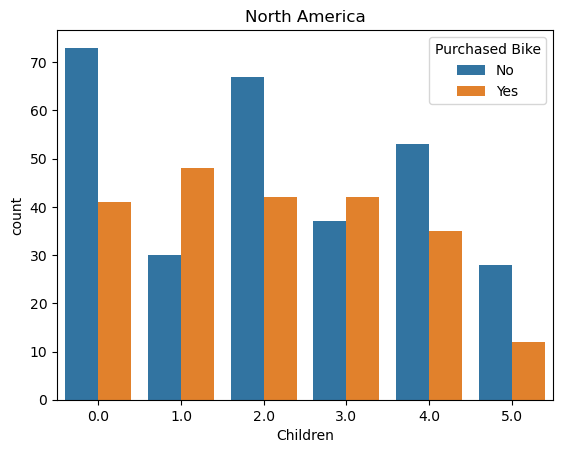

In [9]:
regions = ['North America','Europe','Pacific','All']
dd1 = widgets.Dropdown (options=regions, value=regions[0], description="Region")
def show_count(region):
        if region == 'All':
            sns.countplot(x = 'Children',  hue= 'Purchased Bike', data = df).set_title(region,20)
        elif region == 'North America':
            sns.countplot(x = 'Children',  hue= 'Purchased Bike', data = US).set_title(region,20)
        elif region == 'Europe':
            sns.countplot(x = 'Children',  hue= 'Purchased Bike', data = UK).set_title(region,20)
        elif region == 'Pacific':
            sns.countplot(x = 'Children',  hue= 'Purchased Bike', data = PACIFIC).set_title(region,20)

interact(show_count, region=dd1)


<AxesSubplot:xlabel='Region', ylabel='Children'>

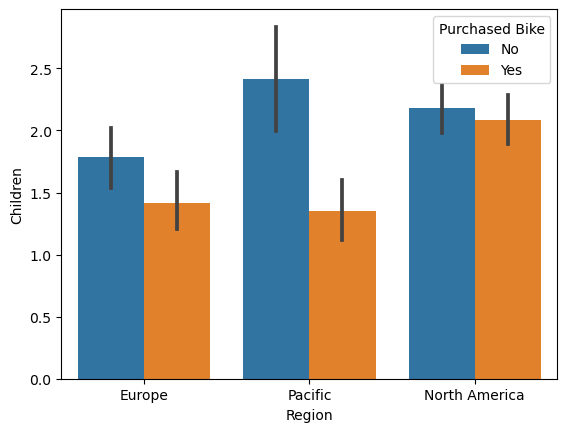

In [10]:
sns.barplot(y = 'Children',  x="Region", hue= 'Purchased Bike', data = df)

<AxesSubplot:xlabel='Region', ylabel='Cars'>

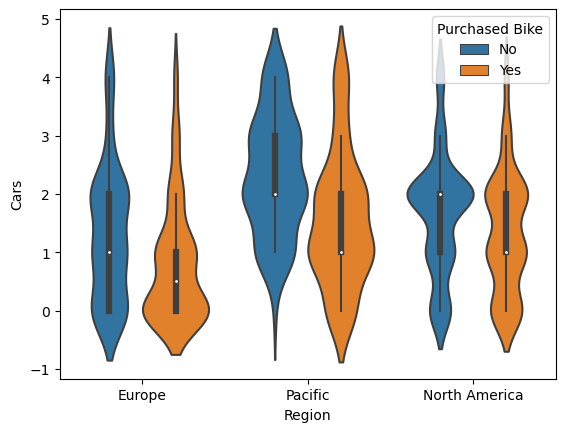

In [11]:
# Plot 
sns.violinplot(y ="Cars", x="Region", hue="Purchased Bike",data = df)
# plt.ylim(0, 5)

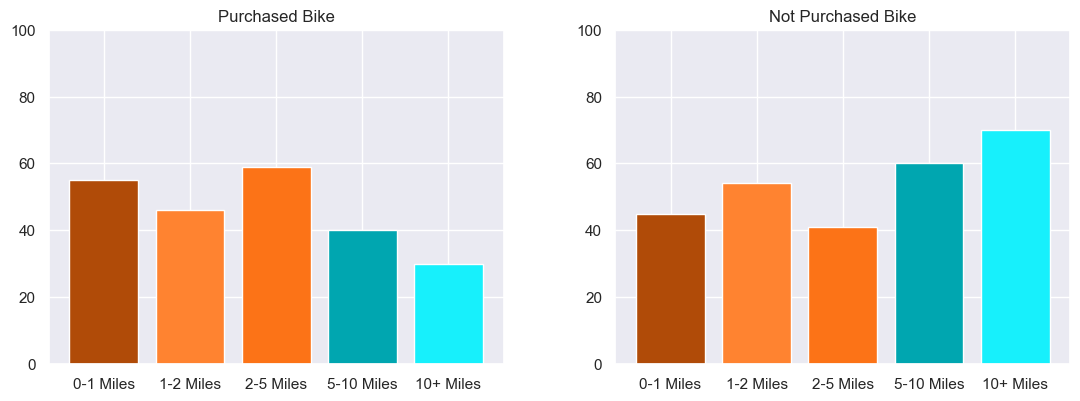

In [12]:
sns.set(rc={'figure.figsize':(12,5)})
fig, axes = plt.subplots(1,2)
fig.tight_layout(pad=4.0)
bike_yes = df[(df['Purchased Bike'] == 'Yes')]
def get_commute_distance(bike, df):
    commute_distance = {'0-1 Miles': round((len(bike[(bike['Commute Distance'] == '0-1 Miles')])/len(df[(df['Commute Distance'] == '0-1 Miles')]))*100),
                   '1-2 Miles': round((len(bike[(bike['Commute Distance'] == '1-2 Miles')])/len(df[(df['Commute Distance'] == '1-2 Miles')]))*100),
                   '2-5 Miles': round((len(bike[(bike['Commute Distance'] == '2-5 Miles')])/len(df[(df['Commute Distance'] == '2-5 Miles')]))*100),
                   '5-10 Miles': round((len(bike[(bike['Commute Distance'] == '5-10 Miles')])/len(df[(df['Commute Distance'] == '5-10 Miles')]))*100),
                   '10+ Miles': round((len(bike[(bike['Commute Distance'] == '10+ Miles')])/len(df[(df['Commute Distance'] == '10+ Miles')]))*100)
                   }
    x_axis = [x for x in commute_distance.keys()]
    y_axis = [x for x in commute_distance.values()]
    return commute_distance, x_axis, y_axis
commute_distance, x_axis, y_axis = get_commute_distance(bike_yes,df)
colors = color=['#B04B08', '#FF8330', '#FC7317', '#00A6B0', '#17F0FC']

axes[0].bar(x_axis, y_axis, color=colors)
bike_no = df[(df['Purchased Bike'] == 'No')]
commute_distance, x_axis, y_axis = get_commute_distance(bike_no,df)
axes[0].set_title("Purchased Bike")
axes[1].bar(x_axis, y_axis, color=colors)
axes[1].set_title("Not Purchased Bike")
plt.setp(axes, ylim=(0,100))
plt.show()

In [13]:
regions = ['North America','Europe','Pacific','All']
dd1 = widgets.Dropdown (options=regions, value=regions[0], description="Region")

def draw_seaborn(region):
    if region == 'All':
        sns.swarmplot(data=df, x="Purchased Bike",y="Age", hue="Region", size=7)
    elif region == 'North America':
        sns.swarmplot(data=US, y="Purchased Bike",x="Age", size=5)
    elif region == 'Europe':
        sns.swarmplot(data=UK, y="Purchased Bike",x="Age", size=5, color="orange")
    elif region == 'Pacific':
        sns.swarmplot(data=PACIFIC, y="Purchased Bike",x="Age", size=5, color="green")

interact(draw_seaborn, region=dd1)

interactive(children=(Dropdown(description='Region', options=('North America', 'Europe', 'Pacific', 'All'), va…

<function __main__.draw_seaborn(region)>

In [14]:
purchased_bike = ['Yes','No']
dd2 = widgets.Dropdown (options=purchased_bike, value=purchased_bike[0], description="Purchased Bike")
# def draw_histgram(choice):
#     sns.histplot(data=df[(df['Purchased Bike'] == choice)], x="Age",hue="Region",multiple='stack')
# interact(draw_histgram, choice=dd2)

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
def draw_kde(choice):
    # Using Matplotlib for Subploting
    fig, axes = plt.subplots(3,1)
    purchased = df[df['Purchased Bike'] == choice]
    # Subploting Data Showing Income According to Region and Professin 
    sns.kdeplot(data = purchased[purchased['Region'] == 'Europe'], x = 'Income', hue = 'Occupation', ax = axes[0])
    sns.kdeplot(data = purchased[purchased['Region']=='North America'],x='Income', hue='Occupation', ax=axes[1])
    sns.kdeplot(data = purchased[purchased['Region']=='Pacific'],x='Income', hue='Occupation', ax=axes[2], warn_singular=False)
interact(draw_kde, choice=dd2)

interactive(children=(Dropdown(description='Purchased Bike', options=('Yes', 'No'), value='Yes'), Output()), _…

<function __main__.draw_kde(choice)>

Text(0.5, 1.0, 'Pacific')

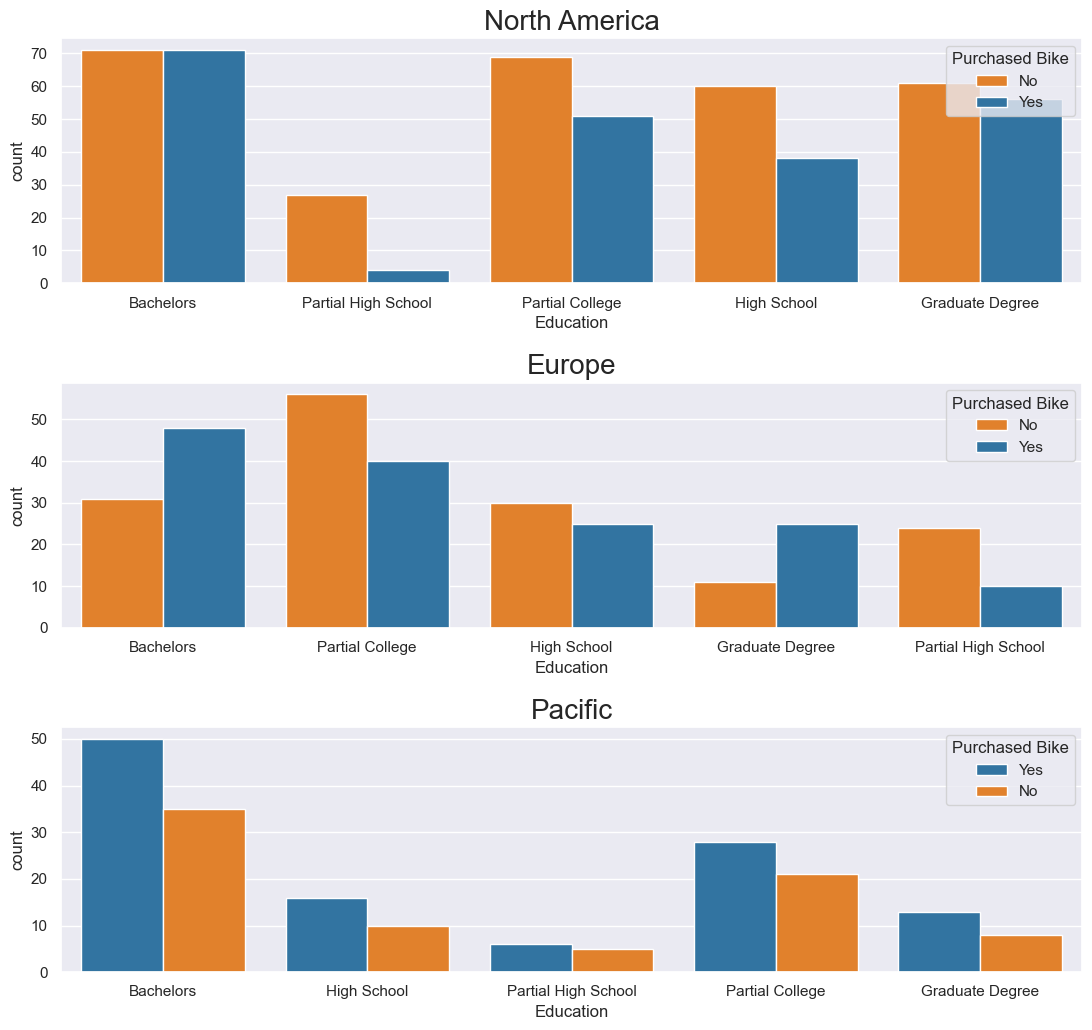

In [16]:
sns.set(rc={'figure.figsize':(12,11)})
fig, axes = plt.subplots(3,1)
p = {
    'Yes': 'tab:blue',
    'No': 'tab:orange',
}
fig.tight_layout(pad=4.0)
sns.countplot(x='Education', hue='Purchased Bike', data=US, ax = axes[0], palette=p).set_title("North America",fontsize=20)
sns.countplot(x='Education', hue='Purchased Bike', data=UK, ax = axes[1], palette=p).set_title("Europe",fontsize=20)
sns.countplot(x='Education', hue='Purchased Bike', data=PACIFIC, ax = axes[2], palette=p).set_title("Pacific",fontsize=20)

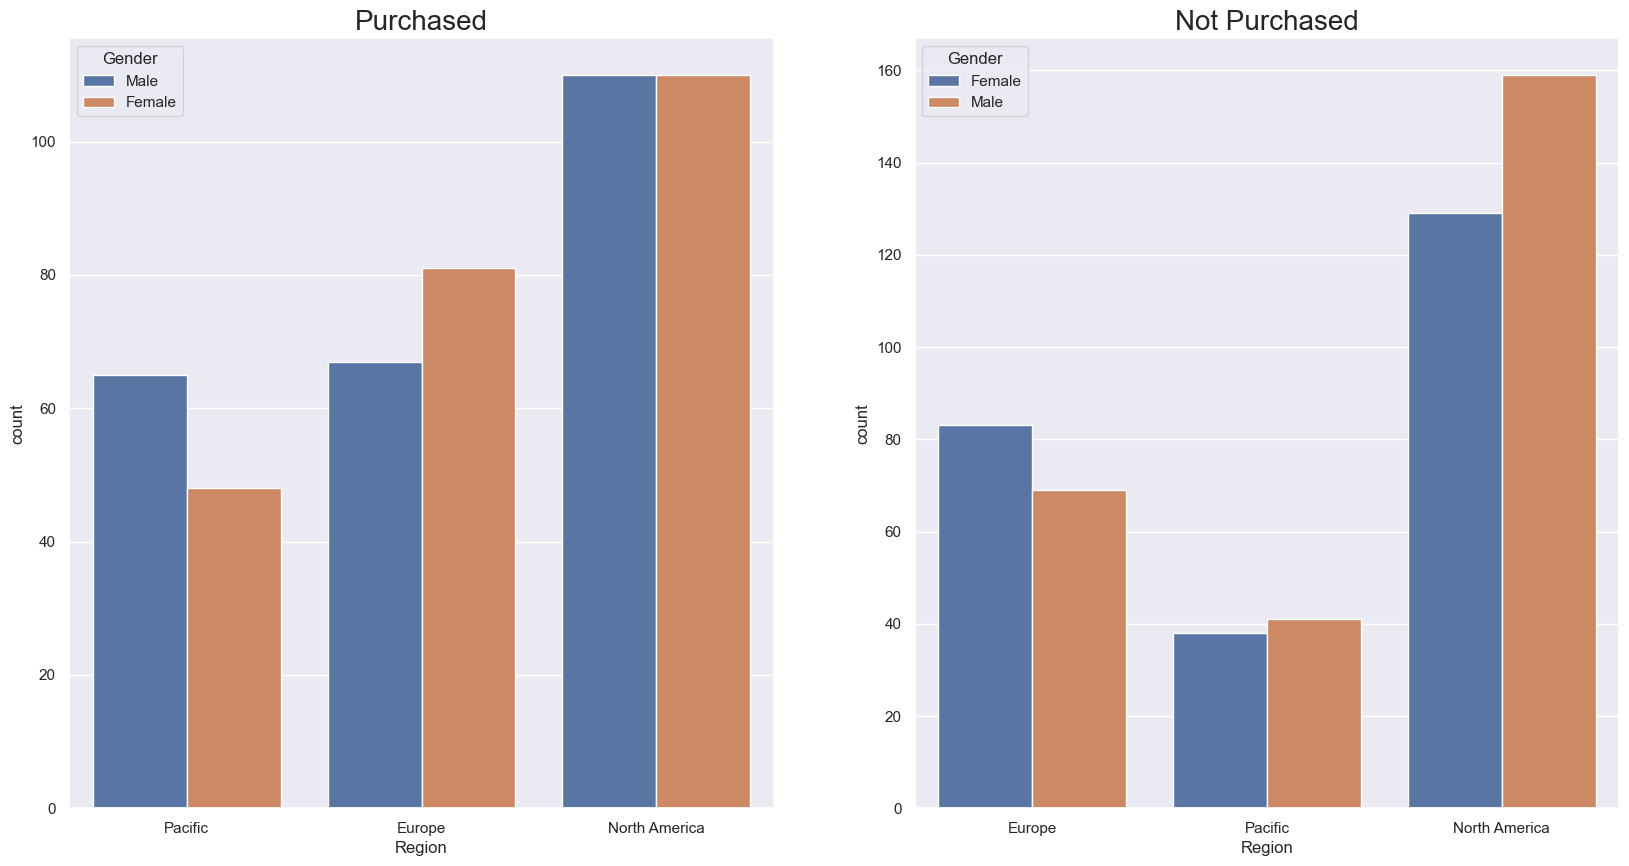

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(1,2)
b1 = sns.countplot(x="Region", hue="Gender", data= df[(df['Purchased Bike'] == 'Yes')], ax=axes[0]).set_title("Purchased",fontsize=20)
b2 = sns.countplot(x="Region", hue="Gender", data= df[(df['Purchased Bike'] == 'No')],ax=axes[1]).set_title("Not Purchased",fontsize=20)
plt.show()

In [18]:
sns.set(rc={'figure.figsize':(12,8)})

def draw_hist(choice):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    purchased = df[df['Purchased Bike'] == choice]
    married = purchased[(purchased['Marital Status'] == 'Married')]
    single = purchased[(purchased['Marital Status'] == 'Single')]
    fig.tight_layout(pad=4.0)
    sns.histplot(data=married[married['Home Owner'] == 'Yes'], x="Region", kde=True, color="#B04B08", ax=axs[0, 0]).set_title("House Owned",fontsize=20)
    sns.histplot(data=married[married['Home Owner'] == 'No'], x="Region", kde=True, color="#ff7700", ax=axs [0, 1]).set_title("House Not Owned",fontsize=20)
    sns.histplot(data=single[single['Home Owner'] == 'Yes'], x="Region", kde=True, color="#ffcc00", ax=axs[1, 0]).set_title("Married",fontsize=20, x=-0.5, y=1.8)
    sns.histplot(data=single[single['Home Owner'] == 'No'], x="Region", kde=True, color="#205AAB", ax=axs[1, 1]).set_title("Single",fontsize=20, x=-1.92, y=0.5)
    plt.show()
interact(draw_hist, choice=dd2)

interactive(children=(Dropdown(description='Purchased Bike', options=('Yes', 'No'), value='Yes'), Output()), _…

<function __main__.draw_hist(choice)>